# IMPORTS

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

%matplotlib inline

# Read in CSV

In [8]:
df = pd.read_csv('beers.csv', index_col=0)

# Check the head of the dataframe

In [9]:
df.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


# Check Dataframe Summary

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         2348 non-null   float64
 1   ibu         1405 non-null   float64
 2   id          2410 non-null   int64  
 3   name        2410 non-null   object 
 4   style       2405 non-null   object 
 5   brewery_id  2410 non-null   int64  
 6   ounces      2410 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 230.6+ KB


Many 'ibu' nulls, 5 'style'nulls

# Work on Nulls

In [13]:
null_IBU = beers[beers['ibu'].isnull()]
null_IBU.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2403,0.055,NaN,1045,Wynkoop Pumpkin Ale,Pumpkin Ale,424,12.0
2404,0.075,NaN,1035,Rocky Mountain Oyster Stout,American Stout,424,12.0
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0


Found some IBU data on Google, manually adding the IBU below

In [18]:
df.at[0,'ibu']= 14.0
df.at[628,'ibu']= 29.0
df.at[1362,'ibu']= 23.0
df.at[345,'ibu']= 19.0
df.at[1759,'ibu']= 24.0
df.at[2070,'ibu']= 15.0
df.at[1626,'ibu']= 35.0
df.at[1415,'ibu']= 18.0
df.at[626,'ibu']= 36.0
df.at[358,'ibu']= 22.0
df.at[1069,'ibu']= 18.0
df.at[2407,'ibu']= 18.0
df.at[1273,'ibu']= 40.0
df.at[1930,'ibu']= 17.0
df.at[922,'ibu']= 25.0
df.at[235,'ibu']= 17.0
df.at[1615,'ibu']= 19.0
df.at[1692,'ibu']= 25.0
df.at[1502,'ibu']= 20.0
df.at[327,'ibu']= 24.0
df.at[1416,'ibu']= 11.0
df.at[623,'ibu']= 14.0
df.at[298,'ibu']= 21.0
df.at[748,'ibu']= 10.0
df.at[1765,'ibu']= 10.0
df.at[426,'ibu']= 33.0
df.at[2381,'ibu']= 30.0
df.at[1664,'ibu']= 23.0
df.at[643,'ibu']= 17.0
df.at[1544,'ibu']= 29.0
df.at[541,'ibu']= 28.0
df.at[186,'ibu']= 17.0
df.at[541,'abv']= 0.052

# Dropping the rest of the Nulls

In [19]:
mask = df[df['ibu'].notnull()]

In [44]:
df = mask[mask['style'].notnull()]

# Checking Summary Again

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 2408
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         1435 non-null   float64
 1   ibu         1435 non-null   float64
 2   id          1435 non-null   int64  
 3   name        1435 non-null   object 
 4   style       1435 non-null   object 
 5   brewery_id  1435 non-null   int64  
 6   ounces      1435 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 89.7+ KB


# Creating name+style Column

In [46]:
df['name_style'] = df['name'].str.lower() + df['style'].str.lower()

<ipython-input-46-c8475ab09aea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name_style'] = df['name'].str.lower() + df['style'].str.lower()


In [47]:
df.head()

,abv,ibu,id,name,style,brewery_id,ounces,name_style
0,0.050,14.0,1436,Pub Beer,American Pale Lager,408,12.0,pub beeramerican pale lager
14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0,bitter bitchamerican pale ale (apa)
21,0.099,92.0,1036,Lower De Boom,American Barleywine,368,8.4,lower de boomamerican barleywine
22,0.079,45.0,1024,Fireside Chat,Winter Warmer,368,12.0,fireside chatwinter warmer
24,0.044,42.0,876,Bitter American,American Pale Ale (APA),368,12.0,bitter americanamerican pale ale (apa)


# Create Beer Super Category

In [48]:
ales = ['ale', 'stout', 'porter', 'ipa','dubbel','warmer','altbier','tripel','barleywine','quadrupel','rye','bitter','hefeweizen','witbier','gose','oktoberfest','weissbier']
lagers = ['lager', 'pilsner','pilsener', 'bock','schwarzbier','zwickel', 'keller','common','kölsch']

#function to find a beers super category by searching the name_style column, and returing the super category  
def list_matcher(x):
    for i in ales:
        if i in x:
            return 'ale'
    for i in lagers:
        if i in x:
            return 'lager'
        

# Work on Nulls

In [49]:
df['super_category'] = df['name_style'].apply(list_matcher)

<ipython-input-49-bcf2b074f893>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['super_category'] = df['name_style'].apply(list_matcher)


In [50]:
df.sample(10)

,abv,ibu,id,name,style,brewery_id,ounces,name_style,super_category
1670,0.069,17.0,1463,Hideout Helles,Munich Helles Lager,135,12.0,hideout hellesmunich helles lager,lager
2314,0.075,31.0,1730,Wynona's Big Brown Ale,American Brown Ale,322,12.0,wynona's big brown aleamerican brown ale,ale
765,0.054,48.0,1967,General George Patton Pilsner,Czech Pilsener,26,16.0,general george patton pilsnerczech pilsener,lager
1837,0.070,68.0,1765,Golden Ratio IPA,American IPA,183,16.0,golden ratio ipaamerican ipa,ale
1440,0.057,29.0,1145,Cardinal Pale Ale,American Pale Ale (APA),337,12.0,cardinal pale aleamerican pale ale (apa),ale
366,0.049,35.0,81,Hazed & Infused (2010),American Pale Ale (APA),417,12.0,hazed & infused (2010)american pale ale (apa),ale
1836,0.060,53.0,1766,Humulus Nimbus Super Pale Ale,American Pale Ale (APA),183,16.0,humulus nimbus super pale aleamerican pale ale...,ale
151,0.055,12.0,2502,Vanilla Java Porter,American Porter,72,16.0,vanilla java porteramerican porter,ale
254,0.050,35.0,1712,Montana Trout Slayer Ale,American Pale Wheat Ale,336,12.0,montana trout slayer aleamerican pale wheat ale,ale
479,0.099,115.0,2471,Hopkick Dropkick,American Double / Imperial IPA,24,12.0,hopkick dropkickamerican double / imperial ipa,ale


Manually Fix Some Beers

In [51]:
df.at[2078,'super_category']='lager'
df.at[65,'super_category']='lager'

In [63]:
df['type'] = df.super_category.map({'ale':0, 'lager':1})

<ipython-input-63-b885d85661db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'] = df.super_category.map({'ale':0, 'lager':1})


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 2408
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   abv             1435 non-null   float64
 1   ibu             1435 non-null   float64
 2   id              1435 non-null   int64  
 3   name            1435 non-null   object 
 4   style           1435 non-null   object 
 5   brewery_id      1435 non-null   int64  
 6   ounces          1435 non-null   float64
 7   name_style      1435 non-null   object 
 8   super_category  1405 non-null   object 
 9   type            1405 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 163.3+ KB


# Add Remaining Beers to New DataFrame

In [65]:
craftbeers = df[df['super_category'].notnull()]

# Summary Statistics

In [73]:
craftbeers.describe()

,abv,ibu,id,brewery_id,ounces,type
count,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000
mean,0.059871,42.804270,1409.680427,224.447687,13.499573,0.125979
std,0.013554,25.879861,757.740529,150.622236,2.251343,0.331943
min,0.028000,4.000000,1.000000,0.000000,8.400000,0.000000
25%,0.050000,21.000000,765.000000,98.000000,12.000000,0.000000
50%,0.057000,35.000000,1418.000000,198.000000,12.000000,0.000000
75%,0.068000,64.000000,2069.000000,355.000000,16.000000,0.000000
max,0.125000,138.000000,2692.000000,546.000000,32.000000,1.000000


In [85]:
craftbeers.corr()

,abv,ibu,id,brewery_id,ounces,type
abv,1.000000,0.673899,-0.009708,-0.022408,0.111587,-0.257753
ibu,0.673899,1.000000,0.006348,-0.010846,0.057444,-0.268243
id,-0.009708,0.006348,1.000000,-0.428695,0.053110,-0.034633
brewery_id,-0.022408,-0.010846,-0.428695,1.000000,-0.130123,0.006934
ounces,0.111587,0.057444,0.053110,-0.130123,1.000000,-0.055492
type,-0.257753,-0.268243,-0.034633,0.006934,-0.055492,1.000000


In [110]:
craftbeers.super_category.value_counts(normalize=True)

ale      0.874021
lager    0.125979
Name: super_category, dtype: float64


# Plotting Data

In [91]:
feature_cols = ['abv','ibu']
X = df[feature_cols]
y = df['type']

<AxesSubplot:>

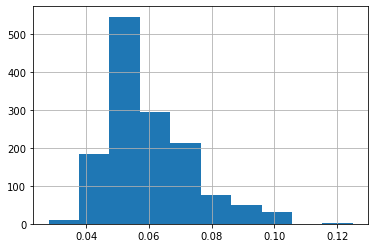

In [66]:
craftbeers['abv'].hist()

<AxesSubplot:>

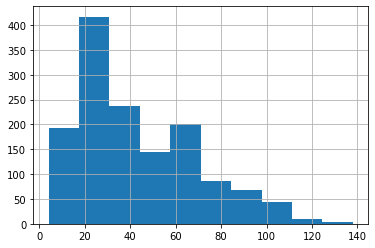

In [67]:
craftbeers['ibu'].hist()

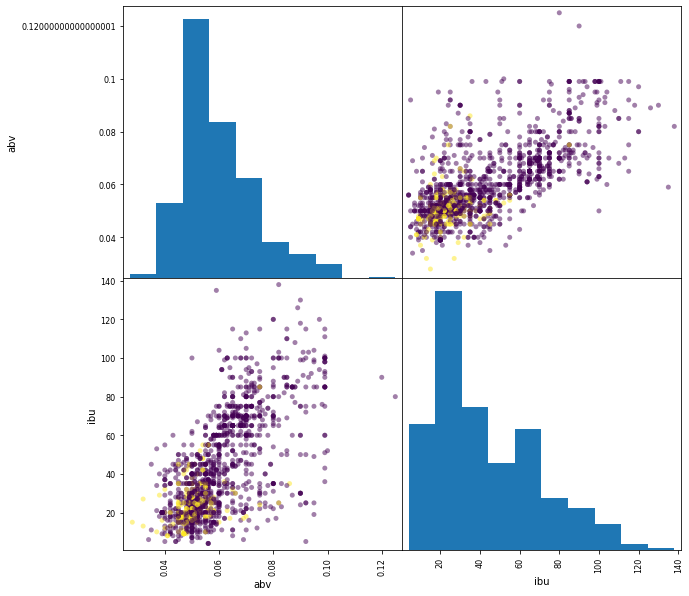

In [103]:
pd.plotting.scatter_matrix(X, c=y, figsize=(10,10), s=100);

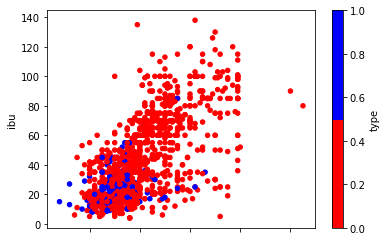

In [104]:
cmap_bold = ListedColormap(['#FF0000','#0000FF'])
craftbeers.plot(kind='scatter', x='abv', y='ibu', c='type', colormap=cmap_bold);

# Export to CSV

In [105]:
craftbeers.to_csv('craftbeers.csv',index=True)